transfer learning: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning.ipynb

Xception: https://keras.io/api/applications/xception/

In [ ]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

from __future__ import absolute_import, division, print_function, unicode_literals

print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root1='/content/drive/My Drive/blur data set'
data_root='/content/drive/My Drive/Data augmentation'


In [ ]:
BATCH_SIZE=64
LEARNING_RATE=0.0003

In [ ]:
import itertools

# function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
                          
              plt.imshow(cm, interpolation='nearest', cmap=cmap)
              plt.title(title)
              tick_marks = np.arange(len(classes))
              plt.xticks(tick_marks, classes, rotation=45)
              plt.yticks(tick_marks, classes)
              fmt = '.2f' if normalize else 'd'
              thresh = cm.max() / 2.
              for i, j in itertools.product(range(cm.shape[0]), 
                      range(cm.shape[1])):
                      plt.text(j, i, format(cm[i, j], fmt),
                               horizontalalignment="center",
                               color="white" if cm[i, j] > thresh else "black")

              plt.tight_layout()
              plt.ylabel('True label')
              plt.xlabel('Predicted label')

create train and validation sets

In [ ]:
IMAGE_SHAPE = (224,224)

TRAINING_DATA_DIR = str(data_root)

print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR,
                                                    subset="validation",
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    target_size=IMAGE_SHAPE)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,
                                                    subset="training",
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    target_size=IMAGE_SHAPE)
TRAINING_DATA_DIR1 = str(data_root1)

print(TRAINING_DATA_DIR1);
datagen_kwargs = dict(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

test_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR1,
                                                    subset="validation",
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=False,
                                                    target_size=IMAGE_SHAPE)

/content/drive/My Drive/Data augmentation
Found 419 images belonging to 3 classes.
Found 1683 images belonging to 3 classes.
/content/drive/My Drive/blur data set
Found 819 images belonging to 3 classes.


In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))

print("Image batch shape: ", image_batch_train.shape)

print("Label batch shape: ", label_batch_train.shape)

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])

dataset_labels = np.array([key.title() for key, value in dataset_labels])

print(dataset_labels)

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 3)
['0' '1' '2']


pretrained model

In [ ]:
INPUT_SHAPE = IMAGE_SHAPE + (3,)

#base_model = tf.keras.applications.Xception(include_top=False,weights="imagenet",input_shape=INPUT_SHAPE,classifier_activation="softmax")

# Pre-Trained CNN Model using imagenet dataset for pre-trained weights
base_model = tf.keras.applications.Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Top Model Block
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(3, activation='softmax')(x)

# add your top layer block to your base model
model = Model(base_model.input, predictions)

print(model.summary())


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
 i=0
 for layer in base_model.layers:
        i+=1
        layer.trainable = False


 print(i)       

132


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
                  loss='categorical_crossentropy',  # categorical_crossentropy if multi-class classifier
                  metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

training the model

In [ ]:
 i=0
 for layer in base_model.layers:
        i+=1



 print(i) 

132


In [ ]:
initial_epochs = 20

#loss0, accuracy0 = model.evaluate(valid_generator)

#print("initial loss: {:.2f}".format(loss0))
#print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_generator,
                    epochs=initial_epochs,
                    verbose=1,
                    validation_data=valid_generator).history 

Epoch 1/20
27/27 [==============================] - 551s 20s/step - loss: 1.0699 - accuracy: 0.4258 - val_loss: 0.8354 - val_accuracy: 0.6897
Epoch 2/20
27/27 [==============================] - 9s 333ms/step - loss: 0.7354 - accuracy: 0.7599 - val_loss: 0.6542 - val_accuracy: 0.7876
Epoch 3/20
27/27 [==============================] - 9s 335ms/step - loss: 0.5721 - accuracy: 0.8420 - val_loss: 0.5563 - val_accuracy: 0.8258
Epoch 4/20
27/27 [==============================] - 9s 345ms/step - loss: 0.5036 - accuracy: 0.8553 - val_loss: 0.4933 - val_accuracy: 0.8640
Epoch 5/20
27/27 [==============================] - 10s 353ms/step - loss: 0.4421 - accuracy: 0.8656 - val_loss: 0.4521 - val_accuracy: 0.8831
Epoch 6/20
27/27 [==============================] - 10s 357ms/step - loss: 0.4019 - accuracy: 0.8745 - val_loss: 0.4155 - val_accuracy: 0.8878
Epoch 7/20
27/27 [==============================] - 10s 358ms/step - loss: 0.3684 - accuracy: 0.9012 - val_loss: 0.3909 - val_accuracy: 0.9045
Epo

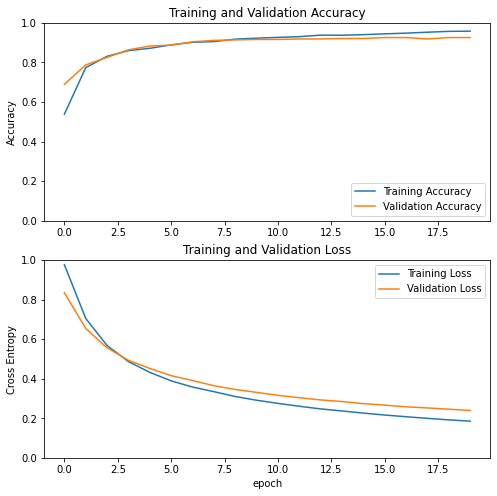

In [ ]:
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

classes = ["0","1", "2"]
loss = model.predict(test_generator, steps=len(test_generator.classes), verbose=1)
prob = pd.DataFrame(loss, columns=classes)
prob['predict'] = prob.idxmax(axis=1)
prob['actual'] = [classes[c] for c in test_generator.classes]
mat = confusion_matrix(prob['actual'], prob['predict'], labels=classes)
print(mat)

819/819 [==============================] - 196s 239ms/step
[[210  15   9]
 [ 14 204   0]
 [  2   5 360]]


In [ ]:
test_generator.reset()
Y_pred = model.predict(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=-1)
sum(y_pred==classes)/10000

from sklearn.metrics import confusion_matrix
confusion_matrix(test_generator.classes[test_generator.index_array],y_pred)

array([[210,  15,   9],
       [ 14, 204,   0],
       [  2,   5, 360]])

In [ ]:
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(valid_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))

7/7 [==============================] - 2s 250ms/step - loss: 0.2396 - accuracy: 0.9260
Train Accuracy: 95.78%
Validation Accuracy: 92.60%


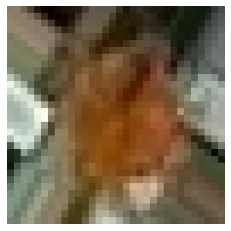

True label: 0
Predicted label: 0


In [ ]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(test_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

Confusion Matrix
[[210  15   9]
 [ 14 204   0]
 [  2   5 360]]
Classification Report
              precision    recall  f1-score   support

     Class 0       0.90      0.93      0.91       226
     Class 1       0.94      0.91      0.92       224
     Class 2       0.98      0.98      0.98       369

    accuracy                           0.95       819
   macro avg       0.94      0.94      0.94       819
weighted avg       0.95      0.95      0.95       819



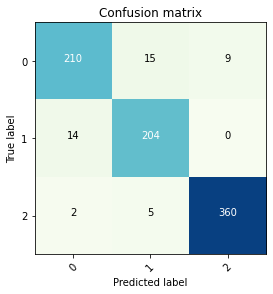

In [ ]:
Y_pred =model.predict(test_generator, test_generator.samples // test_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

tt=test_generator.classes[test_generator.index_array]

y_check=np.round(Y_pred)
predicted_classes = np.argmax(y_check,axis=1)

print('Confusion Matrix')
cm=confusion_matrix(tt,y_pred)
print(cm)
print('Classification Report')

num_classes=3
target_names = ["Class {}".format(i) for i in range(num_classes)]
class_report=classification_report(y_pred,tt, target_names=target_names)
print(class_report)  

plot_confusion_matrix(cm, classes =range(3))

In [ ]:

# serialize the model to disk
print("[INFO] saving detector model...")
model.save('/content/drive/My Drive/cm10model64blur20',save_format="h5" )

[INFO] saving detector model...
